In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os.path

# MODEL = 'NLI'
# MODEL = 'nli_clinical_bert'
MODEL = 'fagner/envoy'

# DATASET = 'control_test'
# DATASET = 'exame_OSCE_cefaleia'
DATASET = 'OSCE'

TSV_PATH = '../from_embeddings_to_tsv/output3/' + DATASET + '/' + MODEL + '/'
# TSV_PATH = '../sentence_embedding/tsv_files/' + DATASET + '/' + MODEL + '/'
# TSV_PATH = '../sentence_embedding/output/' + DATASET + '/' + MODEL + '/'

IMG_PATH = 'imgs/'

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

IMG_PATH +=  DATASET + '/'

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)
    
IMG_PATH += MODEL + '/'

# os.makedirs(path, exist_ok=True)
if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH, exist_ok=True)

if not os.path.exists(TSV_PATH):
    os.makedirs(TSV_PATH, exist_ok=True)
#     os.mkdir(TSV_PATH)

In [11]:
import pandas as pd

embeddings_df = pd.read_csv(TSV_PATH + 'word_embeddings.tsv', sep='\t',header=None)
# embeddings_df = pd.read_csv('../sentence_embedding/tsv_files/stsb-roberta-large/exame-OSCE/cefaleia/word_embeddings.tsv', sep='\t',header=None)

sentences_df = pd.read_csv(TSV_PATH + 'labels.tsv', sep='\t',header=None)
# sentences_df = pd.read_csv('../sentence_embedding/tsv_files/paraphrase-distilroberta-base-v1/exame-OSCE/cefaleia/labels.tsv', sep='\t',header=None)

print(sentences_df)
embeddings_numpy = embeddings_df.to_numpy()
sentences_numpy = sentences_df.to_numpy()

X_embeddings = embeddings_numpy[:, :-1]

provas = []
for i in range(len(X_embeddings)):
    provas.append(i)
embeddings_df

                                                     0
0    1 - location, onset, characteristics, radiatio...
1    2 - When investigating a headache, the onset, ...
2    3 - locate pain (laterality, region); assessme...
3    4 - Pain characteristics (location; intensity;...
4    5 - clinical history- know in what context it ...
..                                                 ...
108                 109 - Headache with or without aur
109  110 - The headache diagnostic approach should ...
110  111 - Non-pharmacological therapy: biofeedback...
111  112 - Characterize the pain in terms of locati...
112  113 - Clinical history: onset of symptoms / ch...

[113 rows x 1 columns]


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,0.221607,0.305385,-0.531400,-0.903145,0.924248,0.453271,-0.394024,-0.840790,-0.829706,-0.220633,...,0.851824,-0.240172,-0.307270,-0.492714,0.583241,-0.036331,-0.909833,0.187564,1.092311,NaN
1,0.211401,0.148134,-0.499562,-0.778110,0.924578,0.388893,-0.257193,-0.828060,-0.751538,-0.163495,...,0.874310,-0.238694,-0.358860,-0.552308,0.561272,-0.045309,-0.894212,0.201650,1.065967,NaN
2,0.096911,0.190012,-0.559983,-0.672056,0.656984,0.401731,-0.357058,-0.592609,-0.567197,-0.285889,...,0.860204,-0.401610,-0.342187,-0.315027,0.416825,-0.142535,-0.850201,0.264463,0.726788,NaN
3,0.141941,0.352270,-0.571933,-0.637719,0.791356,0.330166,-0.343798,-0.726480,-0.549603,-0.250139,...,0.752561,-0.176111,-0.189351,-0.315955,0.423207,-0.097111,-0.868494,0.258013,1.000720,NaN
4,0.109707,0.337133,-0.574666,-0.844187,0.921511,0.526017,-0.209111,-0.905686,-0.790552,-0.252280,...,0.784094,-0.305405,-0.323005,-0.418469,0.528524,-0.175933,-0.884421,0.272468,1.072522,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.235657,0.101352,-0.186024,-0.383586,0.830514,0.063073,-0.628867,-0.004178,-0.292168,-0.028879,...,0.796565,-0.458170,-0.485469,-0.428206,0.052330,0.389622,-0.251018,0.307829,0.228322,NaN
109,0.100606,0.302737,-0.476203,-0.751883,0.842207,0.299053,-0.279062,-0.816479,-0.787793,-0.212487,...,0.758079,-0.248327,-0.251150,-0.419568,0.561927,0.017873,-0.881616,0.212526,1.067087,NaN
110,0.209919,0.205338,-0.330295,-0.418003,0.724451,0.300537,-0.324456,-0.548487,-0.445638,0.079990,...,0.637271,-0.412604,-0.357916,-0.404869,0.191790,-0.219012,-0.666187,0.089438,0.700969,NaN
111,-0.053830,0.410847,-0.547925,-0.604352,0.960136,0.076700,-0.202138,-0.711610,-0.518082,0.005612,...,0.386693,-0.114923,-0.086794,-0.372196,0.386130,-0.051795,-0.706145,-0.100764,0.781880,NaN


In [12]:
from matplotlib import pyplot as plt
import numpy as np

def plot_clustering(X, labels, title=None):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(8, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(provas[i])+'.', color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold'})
        plt.scatter(X[i, 0], X[i, 1], color=plt.cm.nipy_spectral(labels[i] / 10.), s=40, cmap='hsv_r')

# Define os valores nos eixos
    plt.xticks([0,1.1])
    plt.yticks([0,1.1])
    plt.title(title, size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.savefig(title)

In [13]:
def plot_clustering_v2(X, labels, title=None):
    X_2d
    clustered_x = []
    clustered_y = []
    for x in X:
        clustered_x.append(x[0])
        clustered_y.append(x[1])
    
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(len(clustered_x)):
        plt.text(clustered_x[i], clustered_y[i], provas[i], color=plt.cm.nipy_spectral(labels[i] / 10.),
                         fontdict={'weight': 'bold'})

    plt.scatter(clustered_x, clustered_y, color=plt.cm.nipy_spectral(agglomerative.labels_ / 10.), s=40, cmap='hsv_r')
    plt.xticks([])
    plt.yticks([])

    plt.colorbar()

In [14]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

s
7
8
9
10
16
20
25


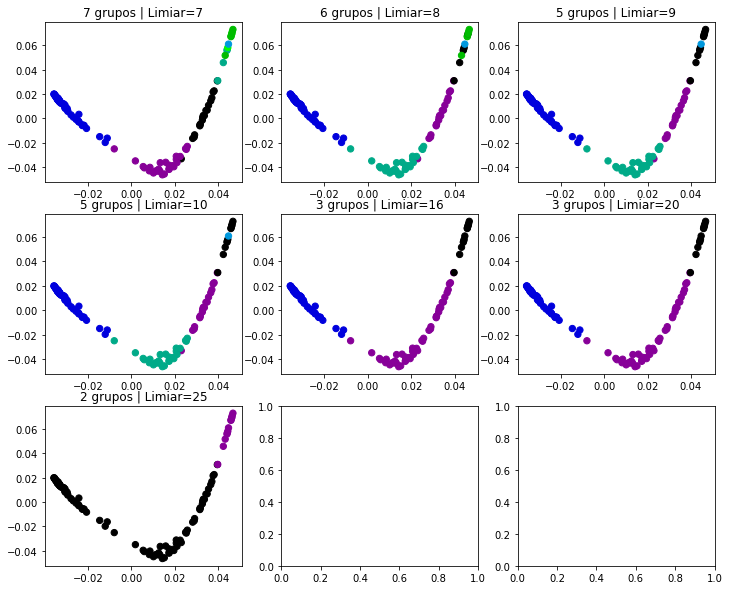

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold

from matplotlib import pyplot as plt 

X_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(X_embeddings)

x = X_2d[:,0]
y = X_2d[:,1]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

set_of_colors = []
n_clusters = []
distance_thresholds = []
models = []
print('s')

distance_thresholds = [7, 8, 9, 10, 16, 20, 25]
# distance_thresholds = [5, 10, 15, 20, 22, 24, 25]
# distance_thresholds = [0.00025, 0.00017, 0.00013, 0.00009, 0.00007, 0.00006, 0.00005]
# distance_thresholds = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
# distance_thresholds = [7, 13, 18, 22, 28, 37, 43]
# distance_thresholds = [1, 5, 7, 9, 10, 12, 15, ]

for i in distance_thresholds:
    print(i)
#     distance_thresholds.append(11+i)
    agglomerative = AgglomerativeClustering(linkage='ward', distance_threshold=i, n_clusters=None)

    agglomerative = agglomerative.fit(X_embeddings)
    
    models.append(agglomerative)
    
    n_clusters.append(agglomerative.n_clusters_)
    colors = []
    for l in agglomerative.labels_:
        colors.append(plt.cm.nipy_spectral(l / 10.))
    set_of_colors.append(colors)
    
ax[0][0].scatter(x, y, color=set_of_colors[0], s=40, cmap='hsv_r')
ax[0][0].title.set_text(str(n_clusters[0]) + ' grupos | Limiar=' + str(distance_thresholds[0]))

ax[0][1].scatter(x, y, color=set_of_colors[1], s=40, cmap='hsv_r')
ax[0][1].title.set_text(str(n_clusters[1]) + ' grupos | Limiar=' + str(distance_thresholds[1]))

ax[0][2].scatter(x, y, color=set_of_colors[2], s=40, cmap='hsv_r')
ax[0][2].title.set_text(str(n_clusters[2]) + ' grupos | Limiar=' + str(distance_thresholds[2]))

ax[1][0].scatter(x, y, color=set_of_colors[3], s=40, cmap='hsv_r')
ax[1][0].title.set_text(str(n_clusters[3]) + ' grupos | Limiar=' + str(distance_thresholds[3]))

ax[1][1].scatter(x, y, color=set_of_colors[4], s=40, cmap='hsv_r')
ax[1][1].title.set_text(str(n_clusters[4]) + ' grupos | Limiar=' + str(distance_thresholds[4]))

ax[1][2].scatter(x, y, color=set_of_colors[5], s=40, cmap='hsv_r')
ax[1][2].title.set_text(str(n_clusters[5]) + ' grupos | Limiar=' + str(distance_thresholds[5]))

ax[2][0].scatter(x, y, color=set_of_colors[6], s=40, cmap='hsv_r')
ax[2][0].title.set_text(str(n_clusters[6]) + ' grupos | Limiar=' + str(distance_thresholds[6]))

plt.savefig(IMG_PATH + 'clusters')
plt.show()


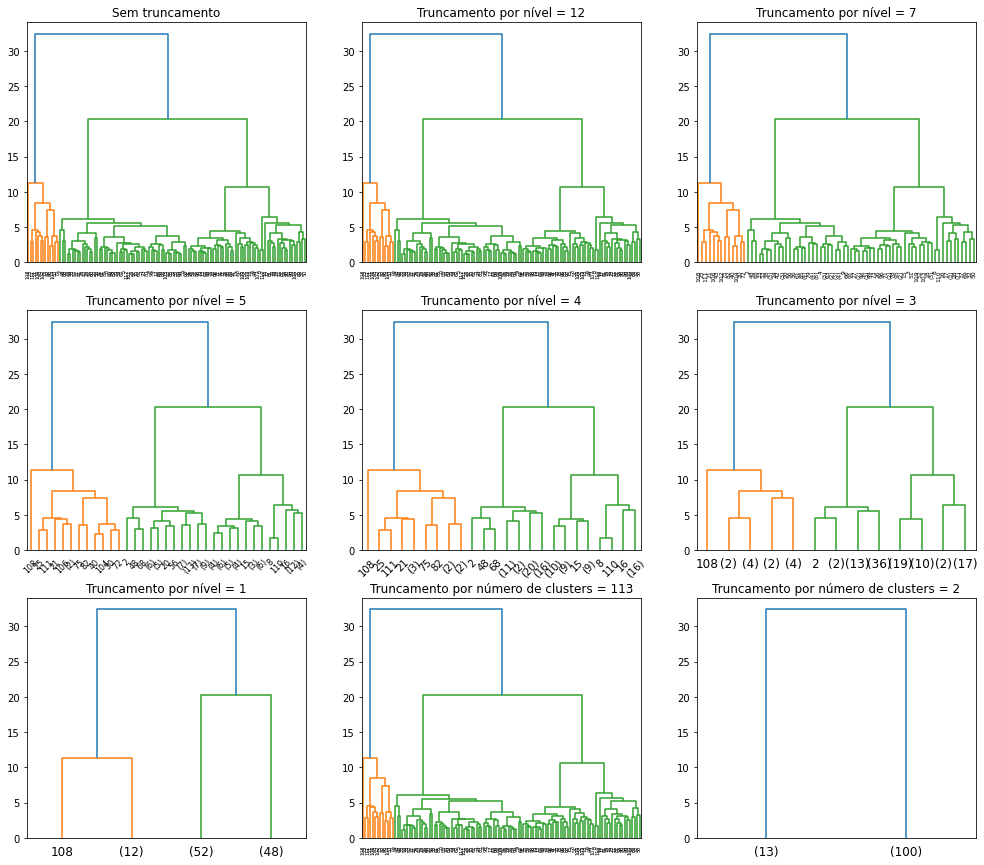

In [31]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(17, 15))

# Sem aplicar truncamento no dendograma
ax[0][0].title.set_text('Sem truncamento')
plot_dendrogram(models[0], truncate_mode=None, ax=ax[0][0])

# Truncando por nível
# Não mais do que p níveis da árvore do dendrograma são exibidos. Um “nível” inclui todos os nós com mesclagens p da última mesclagem. 
ax[0][1].title.set_text('Truncamento por nível = '+ str(12))
plot_dendrogram(models[1], truncate_mode='level', p=12, ax=ax[0][1])

ax[0][2].title.set_text('Truncamento por nível = '+ str(7))
plot_dendrogram(models[2], truncate_mode='level', p=7, ax=ax[0][2])

ax[1][0].title.set_text('Truncamento por nível = '+ str(5))
plot_dendrogram(models[3], truncate_mode='level', p=5, ax=ax[1][0])
ax[1][1].title.set_text('Truncamento por nível = '+ str(4))
plot_dendrogram(models[4], truncate_mode='level', p=4, ax=ax[1][1])
ax[1][2].title.set_text('Truncamento por nível = '+ str(3))
plot_dendrogram(models[5], truncate_mode='level', p=3, ax=ax[1][2])
ax[2][0].title.set_text('Truncamento por nível = '+ str(1))
plot_dendrogram(models[6], truncate_mode='level', p=1, ax=ax[2][0])


# Os últimos p clusters não únicos, formados na rede são os únicos nós não folha na rede; eles correspondem às linhas Z [n-p-2: fim] em Z. Todos os outros clusters não singleton são contraídos em nós folha. 
ax[2][1].title.set_text('Truncamento por número de clusters = '+ str(113))
plot_dendrogram(models[6], truncate_mode='lastp', p=113, ax=ax[2][1])
ax[2][2].title.set_text('Truncamento por número de clusters = '+ str(2))
plot_dendrogram(models[6], truncate_mode='lastp', p=2, ax=ax[2][2])

plt.savefig(IMG_PATH + 'dendograms')
# plot_dendrogram(models[2], truncate_mode='lastp', p=6, ax=ax[0][2])


[7, 6, 5, 5, 3, 3, 2]

AgglomerativeClustering(distance_threshold=7, n_clusters=None)
n clusters:  7
Cluster:  0
Topics (ascending order):
symptoms
perform
factors
nausea
tac
ce
vomiting
pain
migraine
headache

Cluster:  1
Topics (ascending order):
red
associated
location
signs
fever
important
factors
headache
symptoms
pain

Cluster:  2
Topics (ascending order):
important
examination
personal
family
headache
relief
symptoms
factors
pain
history

Cluster:  3
Topics (ascending order):
description
detailed
detect
detected
develop
devices
decreases
headache
109
aur

Cluster:  4
Topics (ascending order):
history
visual
symptoms
changes
signs
alarm
vomiting
fever
nausea
pain

Cluster:  5
Topics (ascending order):
headache
headaches
sinusitis
secondary
migraine
diagnoses
primary
hemorrhage
meningitis
subarachnoid

Cluster:  6
Topics (ascending order):
phonophobia
noise
high
headache
worsen
83
76
phonobobia
photophobia
unilateral

AgglomerativeClustering(distance_threshold=8, n_clusters=None)


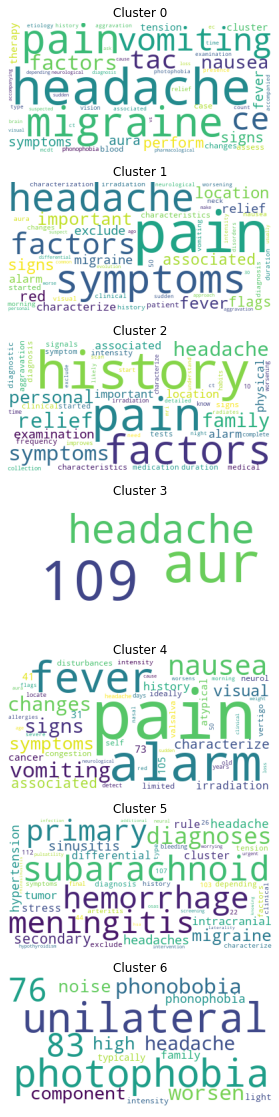

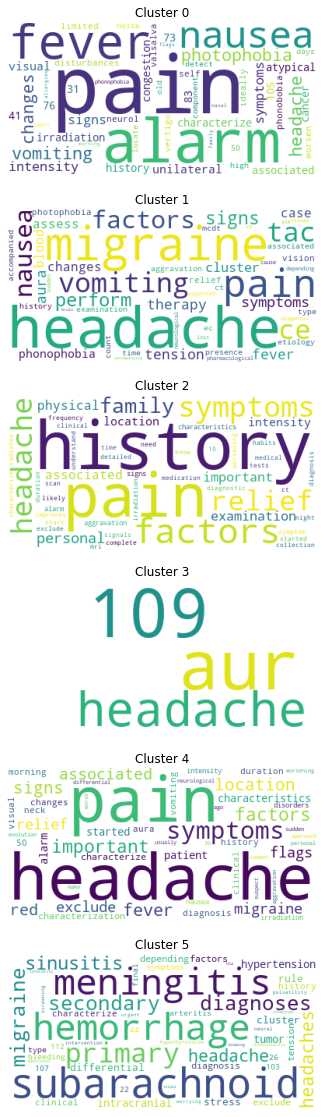

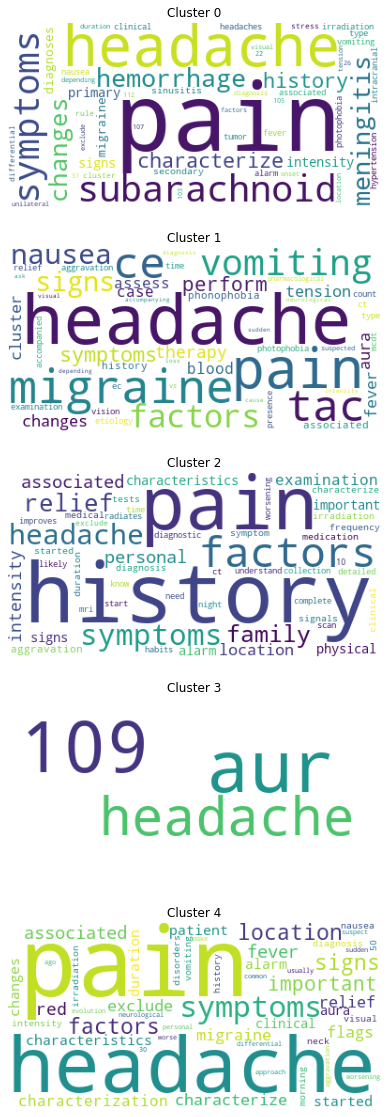

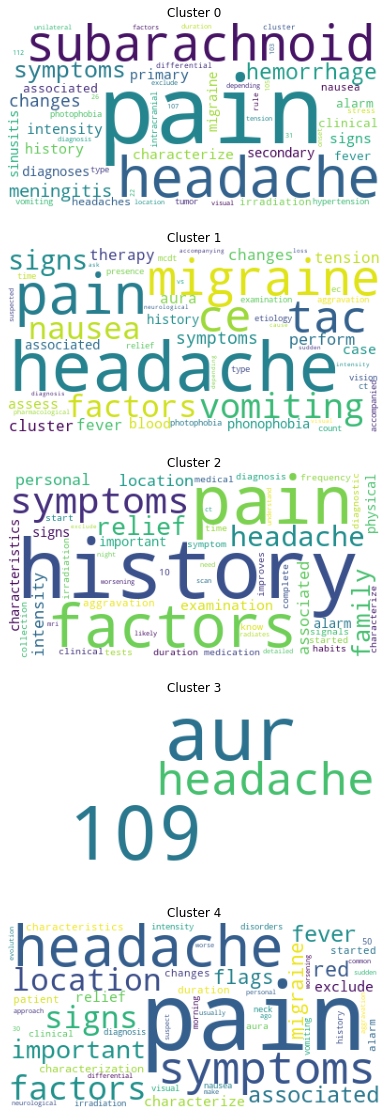

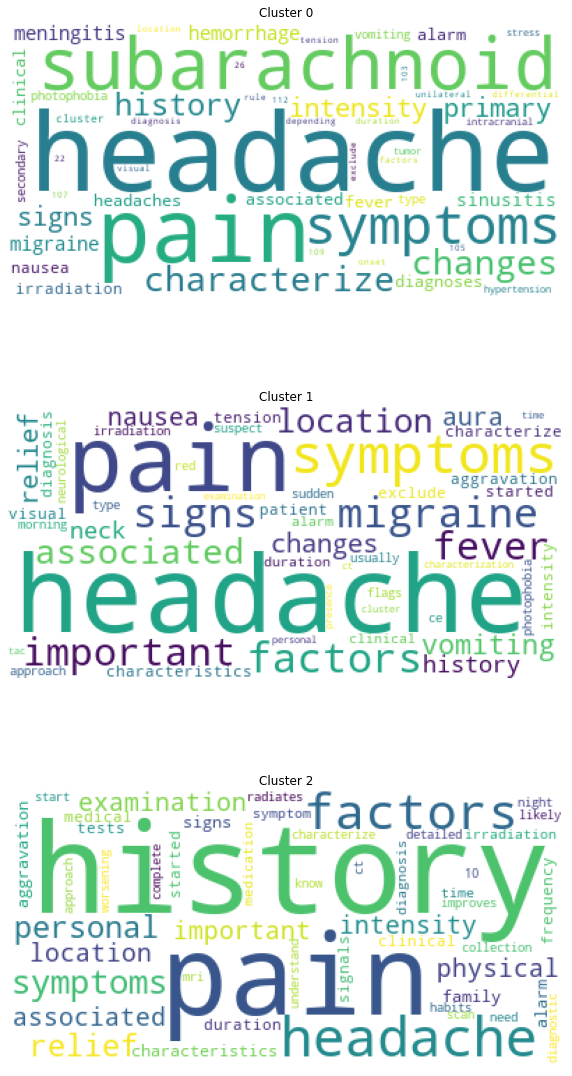

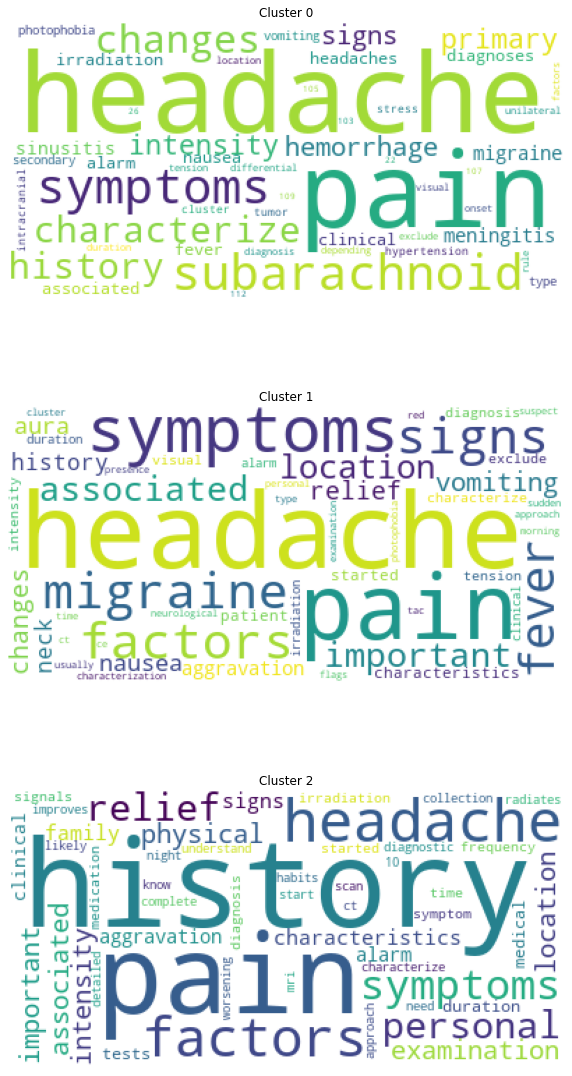

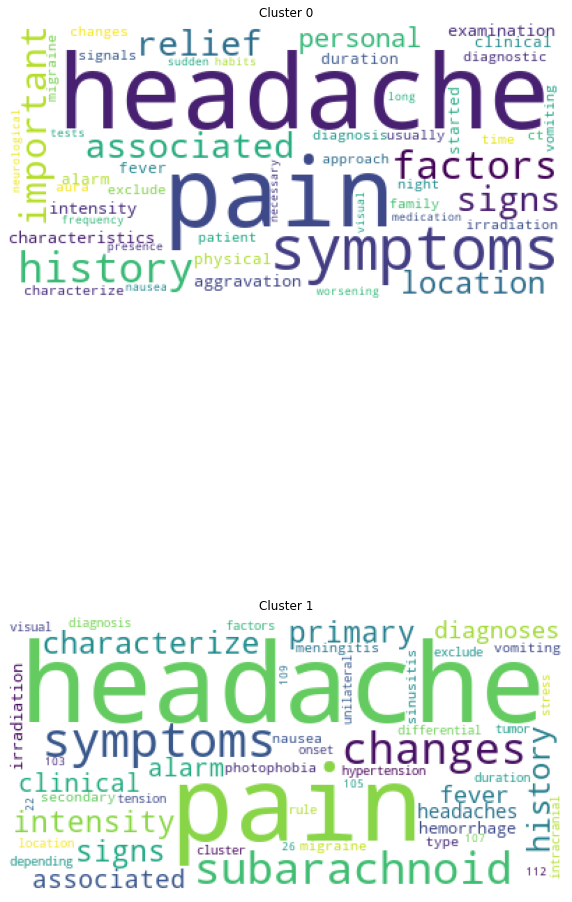

In [32]:


from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS 

tf_idf_vectorizer = TfidfVectorizer(stop_words='english')
# tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.1)

print(n_clusters)
print()

k = 0
for n in n_clusters:
    print(models[k])
    print('n clusters: ',n)

    clusters_of_sentences = [''] * n

    for i in range(len(models[k].labels_)):
        sentence = ''
        sentence = sentences_numpy[i] + ' | '
        clusters_of_sentences[models[k].labels_[i]] += sentence
    
    clusters_of_sentences_formato_tfidf = []
    for d_c in clusters_of_sentences:
        clusters_of_sentences_formato_tfidf.append(str(d_c).split('[')[1].replace('[', '').replace(']\n', '').replace('\'', ''))

    tfidf = tf_idf_vectorizer.fit_transform(clusters_of_sentences_formato_tfidf)
    feature_names = tf_idf_vectorizer.get_feature_names()

    tfidf_matrix = tfidf.toarray()

    i=0
    topics_by_cluster = []
    wordclouds = []
    for d_c in clusters_of_sentences_formato_tfidf:
#         print(d_c)
        print('Cluster: ', i)

        sorted_index_array = np.argsort(tfidf_matrix[i]) 
        highests = sorted_index_array[-10:]

        topics = []
        print('Topics (ascending order):')
        for s in highests:
            print(feature_names[s])
            topics.append(feature_names[s])

        topics_by_cluster.append(topics)

        dense = tfidf[i].todense()
        lst1 = dense.tolist()
        df = pd.DataFrame(lst1, columns=feature_names)

        wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))
        wordclouds.append(wordcloud)

        print()
        i+=1
    fig, axs = plt.subplots(n, figsize=(10, 20))
        
    j=0

    for wc in wordclouds:
        axs[j].title.set_text('Cluster '+str(j))
        axs[j].imshow(wc)
        axs[j].axis("off")
        j+=1
        
#     print(topics_by_cluster)

    k+=1
    plt.savefig(IMG_PATH + 'topicos_por_'+str(n)+'_clusters')